<a href="https://colab.research.google.com/github/akashchaurasiya406/Projects-/blob/main/Sentimental%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q google_play_scraper
!pip install -q transformers
import matplotlib.pyplot as plt


In [4]:
import pandas as pd
import numpy as np
from google_play_scraper import app,Sort,reviews_all




In [5]:
rv_project = reviews_all('com.avira.passwordmanager',sleep_milliseconds=0,lang ='en',country ='US',sort = Sort.NEWEST)

In [ ]:
rv_project

In [7]:
df = pd.json_normalize(rv_project)

In [8]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e9f3b561-463e-4daa-bbd7-dfedcac7403e,Dinesh Singh Rawat,https://play-lh.googleusercontent.com/a/AAcHTt...,Please request don't west your time 🥺🙏,1,0,None,2023-08-03 11:25:37,None,NaT,None
1,aa942133-ad17-486a-84b1-a1e5dd7fd7e5,Shreedharan V,https://play-lh.googleusercontent.com/a/AAcHTt...,"Apparently, the avira password manager does no...",1,0,2.10,2023-07-28 14:33:43,Hello Shreedharan! In order to resolve the iss...,2023-07-31 17:15:15,2.10
2,cdaf3f5b-43a3-478a-b3d8-21af7d7772d4,Giuseppe Gaviani,https://play-lh.googleusercontent.com/a/AAcHTt...,"Avira is an excellent, easy to use password ma...",5,0,2.10,2023-07-28 12:53:06,None,NaT,2.10
3,4122b9a0-45b2-46e8-a31b-93edc070ed37,shanker udayan,https://play-lh.googleusercontent.com/a/AAcHTt...,They make you to subscribe premium with passwo...,1,0,2.10,2023-07-27 15:22:59,Hello shanker! We deeply apologize for the inc...,2023-07-31 17:17:36,2.10
4,cb091ba2-cfaf-48b6-abd7-e08a8b983095,autoPING,https://play-lh.googleusercontent.com/a-/AD_cM...,Perfect 👍,5,1,2.10,2023-07-27 08:37:09,None,NaT,2.10


In [ ]:
df['reviewCreatedVersion'].value_counts()

In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")



In [ ]:
df.dtypes

In [14]:
df['content']= df['content'].astype('str')

In [15]:
from sqlalchemy.engine import result
df['result'] = df['content'].apply(lambda x:sentiment_analysis(x))

In [ ]:
df.head()

In [19]:
df['sentiment'] = df['result'].apply(lambda x:(x[0]['label']))
df['score'] = df['result'].apply(lambda x: (x[0]['score']))

In [ ]:
df.head()

In [ ]:

 sentiment_counts =df['sentiment'].value_counts(normalize =True)
 sentiment_counts


In [ ]:
positive = sentiment_counts[0]
negative = sentiment_counts[1]
print(positive)
print(negative)

In [30]:
sentiments = ['positive','negative']
counts =[positive,negative]

<function matplotlib.pyplot.show(close=None, block=None)>

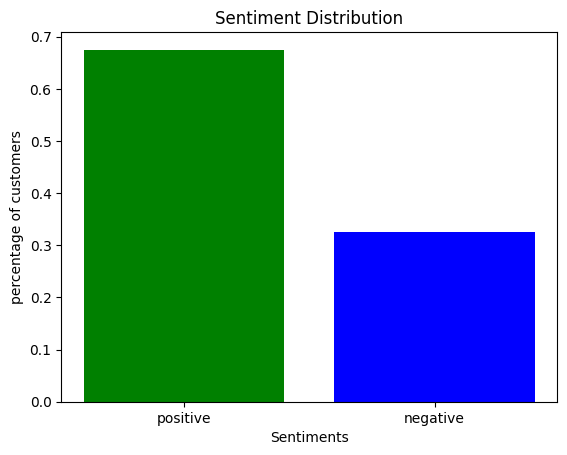

In [34]:
plt.bar(sentiments,counts,color=['green','blue'])
plt.xlabel('Sentiments')
plt.ylabel('percentage of customers')
plt.title('Sentiment Distribution')

plt.show